# Introduction to scikit-learn

**Classification of Handwritten Digits** the task is to predict, given an image, which digit it represents. We are given samples of each of the 10 possible classes (the digits zero through nine) on which we fit an estimator to be able to predict the classes to which unseen samples belong.

## 1. Data collection

## 2. Data preprocessing

A dataset is a dictionary-like object that holds all the data and some metadata about the data.

In [18]:
from sklearn import datasets
digits = datasets.load_digits()

In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/xu/miniconda3/envs/waymo_2d_detection/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [20]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [21]:
digits.data.shape  # n_samples, n_features

(1797, 64)

## digits.images.shape

In [22]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [23]:
digits.target.shape

(1797,)

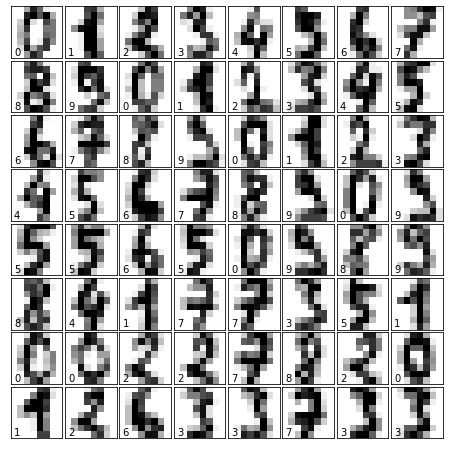

In [7]:
# show images
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary)
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

## 3. Build a model on training data

In scikit-learn, an estimator for classification is a Python object that implements the methods fit(X, y) and predict(T).
An example of an estimator is the class sklearn.svm.SVC that implements support vector classification.

In [24]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

### learning

In [25]:
clf.fit(digits.data[:-500], digits.target[:-500]) 

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### predicting

In [26]:
clf.predict(digits.data[-1:]), digits.target[-1:]

(array([8]), array([8]))

## 4. Evaluate the model on the test data

### learning dataset

In [27]:
(clf.predict(digits.data[:-500]) == digits.target[:-500]).sum() / float(len(digits.target[:-500]))

1.0

### test dataset

In [28]:
(clf.predict(digits.data[-500:]) == digits.target[-500:]).sum() / 500.0

0.97

### evaluation metrics

In [14]:
from sklearn import metrics

def evaluate(expected, predicted):
    print("Classification report:\n%s\n" % metrics.classification_report(expected, predicted))

    print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

predicted = clf.predict(digits.data[-500:])
evaluate(digits.target[-500:], predicted)

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      1.00      0.99        51
           2       1.00      0.98      0.99        49
           3       0.98      0.88      0.93        51
           4       0.98      0.94      0.96        51
           5       0.94      0.98      0.96        51
           6       0.98      1.00      0.99        51
           7       1.00      1.00      1.00        50
           8       0.90      0.98      0.94        46
           9       0.94      0.96      0.95        50

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500


Confusion matrix:
[[49  0  0  0  1  0  0  0  0  0]
 [ 0 51  0  0  0  0  0  0  0  0]
 [ 0  0 48  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  2  0  0  4  0]
 [ 0  0  0  0 48  0  0  0  0  3]
 [ 0  0  0  0  0 50  1  0  0  0]
 

## 5. Deploy to the real system

In [15]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)

In [29]:
clf2.predict(digits.data[-1:]), digits.target[-1:]

(array([8]), array([8]))

## Reference

* http://scikit-learn.org/stable/tutorial/basic/tutorial.html#introduction
* http://nbviewer.ipython.org/urls/raw2.github.com/yhat/DataGotham2013/master/notebooks/4%20-%20scikit-learn%20basics.ipynb?create=1